In [119]:
from copy import deepcopy

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils as kutils

In [120]:
data = load_iris()
X = data["data"]
y = to_categorical(data["target"])

In [121]:
xtr, xts, ytr, yts = train_test_split(X, y, train_size=0.7, shuffle=True)

In [122]:
def make_classic_dense(layer_sizes):
    input, output = layer_sizes[0], layer_sizes[-1]
    model = keras.Sequential()
    model.add(layers.Dense(layer_sizes[1], input_dim=layer_sizes[0], activation="relu"))
    for size in layer_sizes[2:-1]:
        model.add(layers.Dense(size, activation="relu"))
    model.add(layers.Dense(layer_sizes[-1], activation="softmax"))
    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model


def plot_history(hist, sup_txt=""):
    fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(12, 4))

    fig.suptitle(f"History {sup_txt}")

    ax_loss.plot(hist.history["loss"], label="train")
    ax_loss.plot(hist.history["val_loss"], label="test")
    ax_loss.grid()
    ax_loss.set_ylabel("Loss")
    ax_loss.set_xlabel("Epochs")
    ax_loss.legend()

    ax_acc.plot(np.array(hist.history["accuracy"]) * 100, label="train")
    ax_acc.plot(np.array(hist.history["val_accuracy"]) * 100, label="test")
    ax_acc.grid()
    ax_acc.set_ylabel("Accuracy [%]")
    ax_acc.set_xlabel("Epochs")
    ax_acc.legend()
    return fig, (ax_loss, ax_acc)

In [123]:
models = {
    "Dense[8]": [make_classic_dense([4, 8, 3])],
    "Dense[8,8]": [make_classic_dense([4, 8, 8, 3])],
    "Dense[8,16,8]": [make_classic_dense([4, 8, 16, 8, 3])],
}
_ = [model[0].summary() for model in models.values()]

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 8)                 40        
                                                                 
 dense_99 (Dense)            (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 8)                 40        
                                                                 
 dense_101 (Dense)           (None, 8)                 72        
                                                            

In [124]:
hists = {
    name: model[0].fit(xtr, ytr, validation_data=(xts, yts), epochs=200, batch_size=10, verbose=0)
    for name, model in models.items()
}

[<Figure size 1200x400 with 2 Axes>,
 <Figure size 1200x400 with 2 Axes>,
 <Figure size 1200x400 with 2 Axes>]

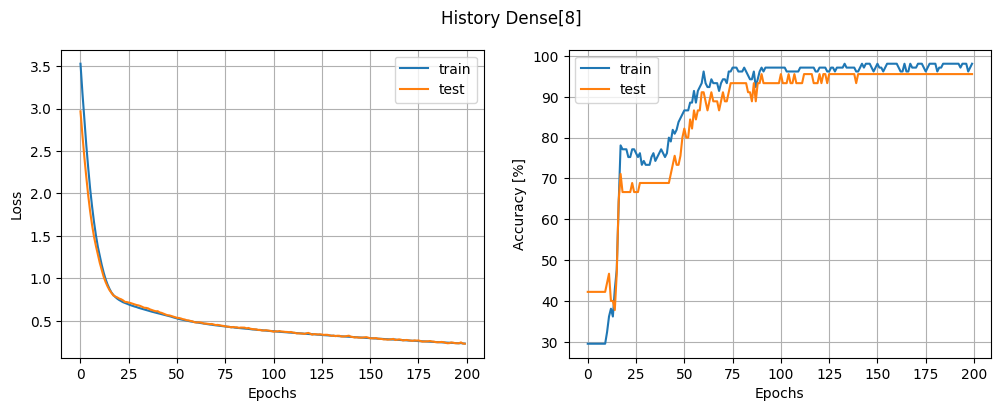

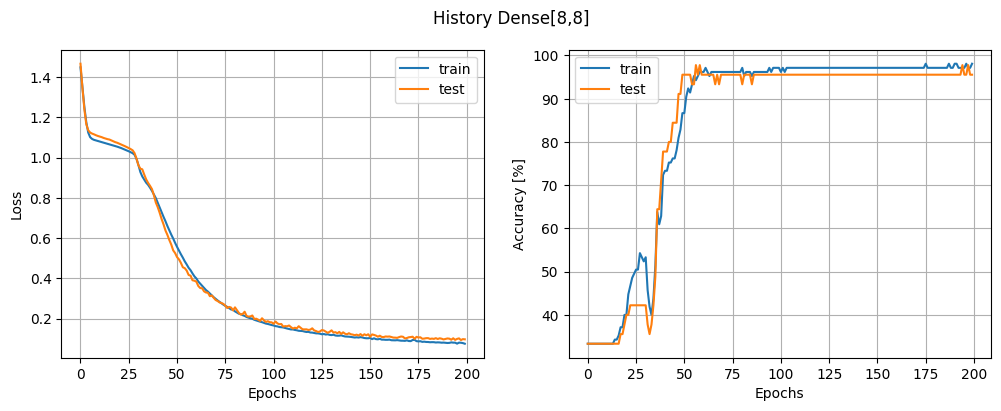

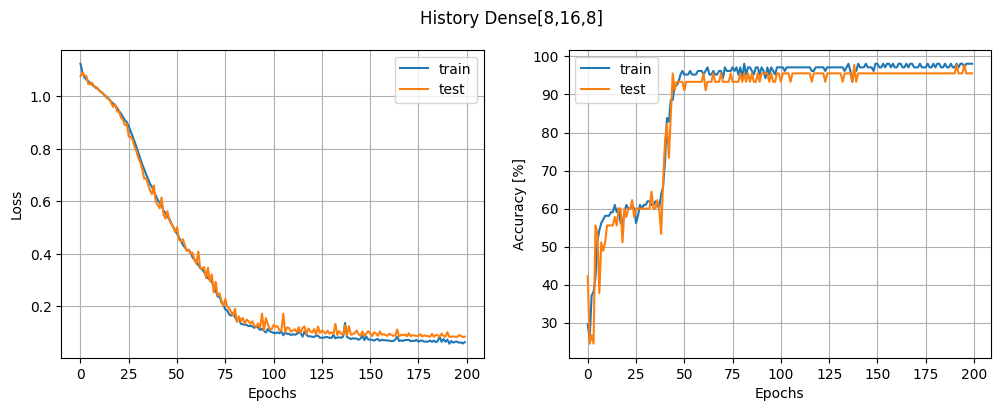

In [125]:
[plot_history(hist, name)[0] for name, hist in hists.items()]